


![](https://s2.tvp.pl/images2/2/7/6/uid_276163f51eb83a636676bcd18b3597271628098022061_width_1280_play_0_pos_0_gs_0_height_720_dlaczego-ceny-w-niemieckim-rossmannie-sa-nizsze-niz-w-polskim-fot-shutterstockgrand-warszawski.jpg)


## Problem Statement

 [Rossmann Store Sales](https://www.kaggle.com/c/rossmann-store-sales)

> Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. 
>
>
> With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.
>
> View and download the data here: https://www.kaggle.com/c/rossmann-store-sales/data

## Importing libraries



In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Let's load the data into Pandas dataframes.

In [2]:
ross_df = pd.read_csv('train.csv', low_memory=False)
store_df = pd.read_csv('store.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('sample_submission.csv')

In [3]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [5]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [6]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Let's merge the information from `store_df` into `train_df` and `test_df`.

In [7]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [8]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Exploratory data analysis and visualization on the dataset.Let's study the distribution of values in each column, and their relationship with the target column `Sales`.

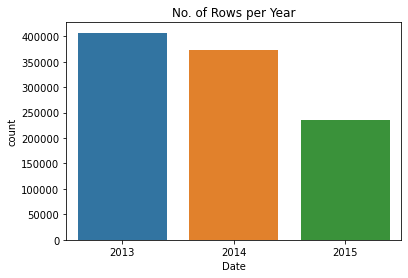

In [9]:

plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(merged_df.Date).dt.year);

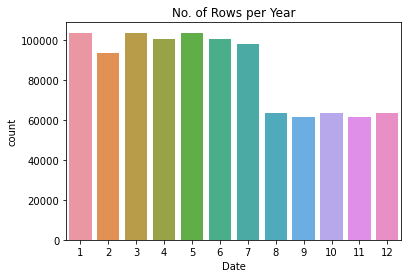

In [10]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(merged_df.Date).dt.month);

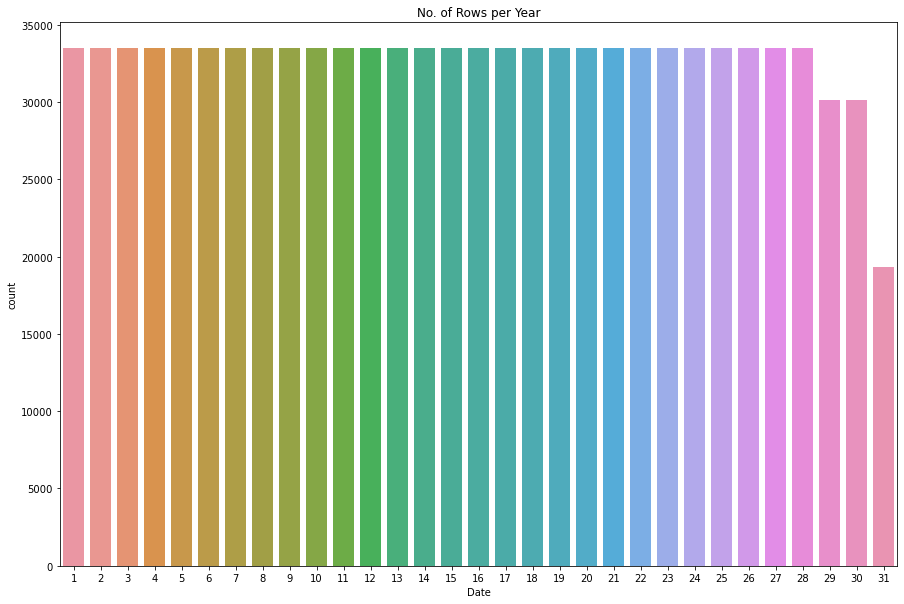

In [11]:
plt.figure(figsize=(15,10)) 
plt.title('No. of Rows per Year')

sns.countplot(x=pd.to_datetime(merged_df.Date).dt.day);

## Preprocessing and Feature Engineering

Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations.

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO


### Date

First, let's convert `Date` to a `datecolumn` and extract different parts of the date.

In [13]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])#
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week
    df['WeekOfYear'] = df['WeekOfYear'].astype(int)

In [14]:
split_date(merged_df)
split_date(merged_test_df)

In [15]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

### Store Open/Closed

Next, notice that the sales are zero whenever the store is closed.

In [17]:
merged_df[merged_df.Open == 0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

Instead of trying to model this relationship, it would be better to hard-code it in our predictions, and remove the rows where the store is closed. We won't remove any rows from the test set, since we need to make predictions for every row.

In [18]:
merged_df = merged_df[merged_df.Open == 1].copy()

In [19]:
merged_df.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
338747,541,6,2014-09-13,5347,710,1,0,0,0,a,...,7.0,1990.0,0,NaN,NaN,NaN,2014,9,13,37
801161,262,6,2013-07-13,16446,3108,1,0,0,0,b,...,5.0,2013.0,0,NaN,NaN,NaN,2013,7,13,28
773948,924,3,2013-08-07,3873,400,1,0,0,1,a,...,4.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2013,8,7,32
783579,520,1,2013-07-29,6156,581,1,1,0,1,a,...,NaN,NaN,1,40.0,2012.0,"Mar,Jun,Sept,Dec",2013,7,29,31
625929,85,2,2013-12-17,9498,1080,1,1,0,0,b,...,10.0,2011.0,0,NaN,NaN,NaN,2013,12,17,51
553686,317,4,2014-02-20,4944,526,1,1,0,0,d,...,7.0,2013.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2014,2,20,8
580049,1035,2,2014-01-28,4312,617,1,0,0,0,a,...,NaN,NaN,0,NaN,NaN,NaN,2014,1,28,5
943497,993,5,2013-03-08,8319,865,1,1,0,0,d,...,10.0,2013.0,1,10.0,2014.0,"Jan,Apr,Jul,Oct",2013,3,8,10
853919,615,1,2013-05-27,12913,1503,1,1,0,0,d,...,8.0,2007.0,0,NaN,NaN,NaN,2013,5,27,22
95059,285,4,2015-05-07,4277,427,1,1,0,0,a,...,NaN,NaN,0,NaN,NaN,NaN,2015,5,7,19


### Competition

Next, we can use the columns `CompetitionOpenSince[Month/Year]` columns from `store_df` to compute the number of months for which a competitor has been open near the store.

In [20]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [21]:
comp_months(merged_df)
comp_months(merged_test_df)

In [22]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


<AxesSubplot:xlabel='CompetitionOpen', ylabel='Sales'>

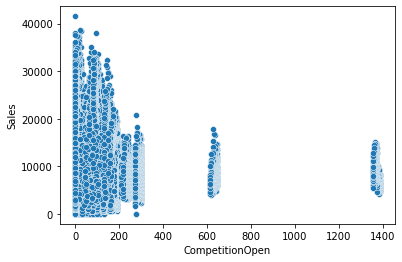

In [23]:
sns.scatterplot(data=merged_df,x=merged_df['CompetitionOpen'],y='Sales')

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

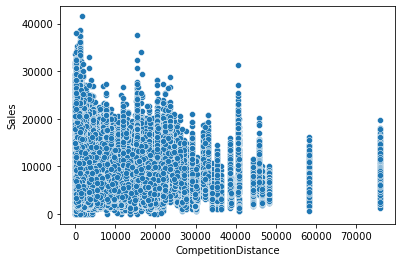

In [24]:
sns.scatterplot(data=merged_df,x=merged_df['CompetitionDistance'],y='Sales')

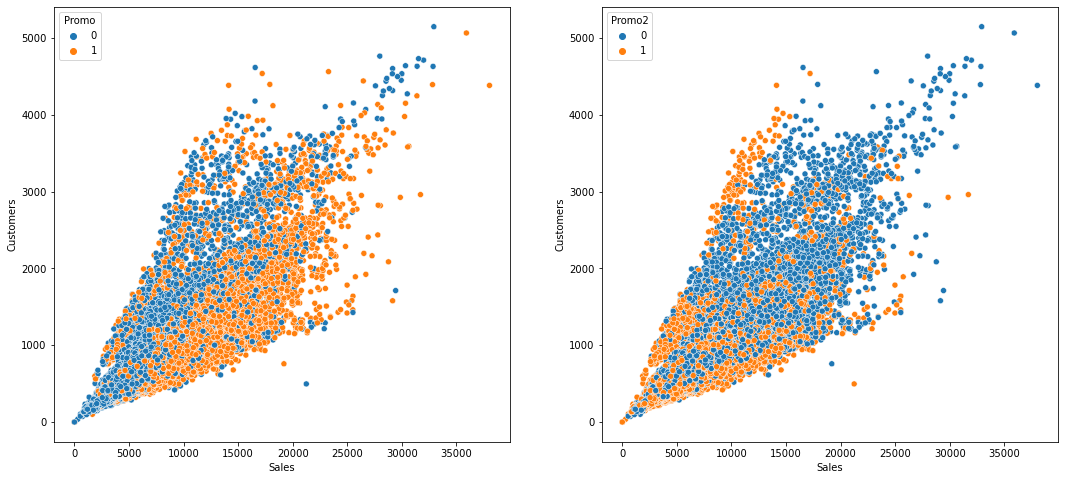

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
temp_df = merged_df.sample(100000)
sns.scatterplot(temp_df.Sales, temp_df.Customers, hue=temp_df.Promo, ax=ax1)
sns.scatterplot(temp_df.Sales, temp_df.Customers, hue=temp_df.Promo2, ax=ax2)
plt.show()

Let's view the results of the new columns we've created.

In [26]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
66916,2015-06-01,50.0,2005.0,12.0,114.0
500251,2014-04-09,5830.0,2011.0,9.0,31.0
106513,2015-04-27,360.0,NaN,NaN,0.0
547461,2014-02-26,5390.0,2003.0,8.0,126.0
752850,2013-08-26,490.0,2012.0,9.0,11.0
953110,2013-02-27,2110.0,1995.0,11.0,207.0
404612,2014-07-05,27150.0,NaN,NaN,0.0
108421,2015-04-25,2460.0,2012.0,1.0,39.0
24467,2015-07-10,1710.0,2015.0,7.0,0.0
462377,2014-05-13,1110.0,NaN,NaN,0.0


### Additional Promotion

We can also add some additional columns to indicate how long a store has been running `Promo2` and whether a new round of `Promo2` starts in the current month.

In [27]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [28]:
promo_cols(merged_df)
promo_cols(merged_test_df)

Let's view the results of the columns we've created.

In [29]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
630389,2013-12-13,0,NaN,NaN,NaN,0.000000,0
641261,2013-12-04,0,NaN,NaN,NaN,0.000000,0
312264,2014-10-11,0,NaN,NaN,NaN,0.000000,0
689697,2013-10-21,0,NaN,NaN,NaN,0.000000,0
163925,2015-03-06,1,2009.0,45.0,"Jan,Apr,Jul,Oct",63.967213,0
650784,2013-11-25,1,2012.0,22.0,"Mar,Jun,Sept,Dec",17.967213,0
564616,2014-02-10,0,NaN,NaN,NaN,0.000000,0
86455,2015-05-15,1,2011.0,14.0,"Jan,Apr,Jul,Oct",49.377049,0
833034,2013-06-15,1,2014.0,40.0,"Jan,Apr,Jul,Oct",0.000000,0
280437,2014-11-14,1,2013.0,1.0,"Jan,Apr,Jul,Oct",22.327869,0


The features related to competition and promotion are now much more useful.

### Input and Target Columns

Let's select the columns that we'll use for training.

In [30]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [31]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [32]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [33]:
test_inputs = merged_test_df[input_cols].copy()

Let's also identify numeric and categorical columns. 

In [34]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

### Impute missing numerical data

In [35]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [36]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

Seems like competition distance is the only missing value, and we can simply fill it with the highest value (to indicate that competition is very far away).

In [37]:
max_distance = inputs.CompetitionDistance.max()


In [38]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

In [39]:
inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,5,1,0,1,c,a,1270.0,82.0,31,7,2015,31,0,0.000000,0
1,2,5,1,0,1,a,a,570.0,92.0,31,7,2015,31,1,64.131148,1
2,3,5,1,0,1,a,a,14130.0,103.0,31,7,2015,31,1,51.901639,1
3,4,5,1,0,1,c,c,620.0,70.0,31,7,2015,31,0,0.000000,0
4,5,5,1,0,1,a,a,29910.0,3.0,31,7,2015,31,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,0,a,1,b,a,150.0,76.0,1,1,2013,1,0,0.000000,0
1016827,733,2,0,a,1,b,b,860.0,159.0,1,1,2013,1,0,0.000000,0
1016863,769,2,0,a,1,b,b,840.0,0.0,1,1,2013,1,1,1.213115,1
1017042,948,2,0,a,1,b,b,1430.0,0.0,1,1,2013,1,0,0.000000,0


In [40]:
targets

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1016776     3375
1016827    10765
1016863     5035
1017042     4491
1017190     5961
Name: Sales, Length: 844392, dtype: int64

In [41]:
test_inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,4,1,0,0,c,a,1270.0,84.0,17,9,2015,38,0,0.000000,0
1,3,4,1,0,0,a,a,14130.0,105.0,17,9,2015,38,1,53.508197,0
2,7,4,1,0,0,a,c,24000.0,29.0,17,9,2015,38,0,0.000000,0
3,8,4,1,0,0,a,a,7520.0,11.0,17,9,2015,38,0,0.000000,0
4,9,4,1,0,0,a,c,2030.0,181.0,17,9,2015,38,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,0,0,0,a,a,1900.0,14.0,1,8,2015,31,1,24.000000,0
41084,1112,6,0,0,0,c,c,1880.0,112.0,1,8,2015,31,0,0.000000,0
41085,1113,6,0,0,0,a,c,9260.0,0.0,1,8,2015,31,0,0.000000,0
41086,1114,6,0,0,0,a,c,870.0,0.0,1,8,2015,31,0,0.000000,0


### Scale Numeric Values

Let's scale numeric values to the 0 to 1 range.

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()
scaler.fit_transform(inputs[numeric_cols])
scaler.transform((test_inputs[numeric_cols]))

array([[0.        , 1.        , 0.        , ..., 0.72727273, 1.        ,
        0.7254902 ],
       [0.00179533, 1.        , 0.        , ..., 0.72727273, 1.        ,
        0.7254902 ],
       [0.005386  , 1.        , 0.        , ..., 0.72727273, 1.        ,
        0.7254902 ],
       ...,
       [0.99820467, 0.        , 0.        , ..., 0.63636364, 1.        ,
        0.58823529],
       [0.99910233, 0.        , 0.        , ..., 0.63636364, 1.        ,
        0.58823529],
       [1.        , 0.        , 1.        , ..., 0.63636364, 1.        ,
        0.58823529]])

### Encode Categorical Columns



Let's one-hot encode categorical columns.

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
inputs[categorical_cols]

,DayOfWeek,StateHoliday,StoreType,Assortment
0,5,0,c,a
1,5,0,a,a
2,5,0,a,a
3,5,0,c,c
4,5,0,a,a
...,...,...,...,...
1016776,2,a,b,a
1016827,2,a,b,b
1016863,2,a,b,b
1017042,2,a,b,b


In [46]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [47]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Finally, let's extract out all the numeric data for training.

In [48]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

### Training



In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error



In [50]:
modeld=DecisionTreeRegressor()

In [51]:
modelrf=RandomForestRegressor()

In [52]:
modelxgb = XGBRegressor()

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_val1, y_train, y_val1 = train_test_split( X, targets, test_size=0.33, random_state=42)

In [55]:
from sklearn.metrics import r2_score,mean_squared_log_error

In [56]:
def train_and_evaluate(model,X_train, train_targets, X_val, val_targets, **params):
    model.fit(X_train, train_targets)
    train_rmse =mean_squared_error(model.predict(X_train), train_targets,squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), val_targets,squared=False)
    print(r2_score(model.predict(X_val),val_targets))
    return model, train_rmse, val_rmse

In [57]:
train_and_evaluate(modeld,X_train, y_train, X_val1, y_val1)

0.810847573578823


(DecisionTreeRegressor(), 0.0, 1353.3427085715248)

In [58]:
train_and_evaluate(modelrf,X_train, y_train, X_val1, y_val1)

0.8910200406889554


(RandomForestRegressor(), 361.4680465324301, 963.875377654735)

In [59]:
train_and_evaluate(modelxgb,X_train, y_train, X_val1, y_val1)

0.7928054598374281


(XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
              reg_lambda=1, ...),
 1169.428494654873,
 1183.453226516302)

## So we can see that RandomForestRegressor works well for this data . Lets tune it's hyperparameters so that it works better
- `n_estimators` - This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed.
-`max_depth` and `max_leaf_nodes`
These arguments are passed directly to each decision tree, and control the maximum depth and max. no leaf nodes of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a max_depth to reduce overfitting.
-`max_features`
Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split.

![](https://camo.githubusercontent.com/ee6bd6545a77f5ac2990b536f56d2270ff17e67999001618ec3b83e288f4497d/68747470733a2f2f692e696d6775722e636f6d2f454a4372535a772e706e67)


In [60]:
# ?RandomForestRegressor

Let's create a helper function to give RMSE of different parameters of RandomForestRegressor

In [61]:
def train_and_evaluaterf(X_train, train_targets, X_val, val_targets, **params):
    model=RandomForestRegressor(n_jobs=-1, random_state=42,**params)
    model.fit(X_train,y_train)
    train_rmse =mean_squared_error(model.predict(X_train), train_targets,squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), val_targets,squared=False)
    return model, train_rmse, val_rmse

In [62]:
base_model=RandomForestRegressor(n_jobs=-1, random_state=42)

In [63]:
# train_and_evaluaterf(X_train,y_train, X_val1, y_val1)
# (RandomForestRegressor(n_jobs=-1, random_state=42),
#  362.53834075250614,
#  965.2192630382283)

In [64]:
# train_and_evaluaterf(X_train,y_train, X_val1, y_val1,n_estimators=50)
# (RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42),
#  370.7608357560374,
#  969.1024702291847)

In [65]:
# train_and_evaluaterf(X_train,y_train, X_val1, y_val1,n_estimators=150)
# (RandomForestRegressor(n_estimators=150, n_jobs=-1, random_state=42),
#  358.95798028047,
#  962.0973277639982)

In [66]:
%%time
# train_and_evaluaterf(X_train,y_train, X_val1, y_val1,n_estimators=100,max_depth=30)
# CPU times: user 14min 11s, sys: 8.14 s, total: 14min 19s
# Wall time: 7min 28s
# (RandomForestRegressor(max_depth=30, n_jobs=-1, random_state=42),
#  423.3931547188969,
#  971.8114590275231)

CPU times: total: 0 ns
Wall time: 1e+03 µs


In [67]:
# train_and_evaluaterf(X_train,y_train, X_val1, y_val1,max_depth=10)
# (RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42),
#  2225.141953189973,
#  2239.874729906028)

In [68]:
%%time
# train_and_evaluaterf(X_train,y_train, X_val1, y_val1,max_depth=50,n_estimators=100)
# (RandomForestRegressor(max_depth=50, n_jobs=-1, random_state=42),
#  362.6414143937307,
#  965.1415228103399)


CPU times: total: 0 ns
Wall time: 0 ns


In [69]:
# train_and_evaluaterf(X_train,y_train, X_val, y_val,max_depth=25)
# (RandomForestRegressor(max_depth=25, n_jobs=-1, random_state=42),
#  611.7823236810075,
#  1025.6532246692252)

In [70]:
# train_and_evaluaterf(X_train,y_train, X_val1, y_val1,max_depth=75)
# (RandomForestRegressor(max_depth=75, n_jobs=-1, random_state=42),
#  362.53834075250614,
#  965.2192630382283)

In [71]:
# train_and_evaluaterf(X_train,y_train, X_val1, y_val1,max_features=5)
# (RandomForestRegressor(max_features=5, n_jobs=-1, random_state=42),
#  538.8163752489463,
#  1435.8095125266386)

In [72]:
# train_and_evaluaterf(X_train,y_train, X_val1, y_val1,max_features=15)
# (RandomForestRegressor(max_features=15, n_jobs=-1, random_state=42),
#  363.1238398778807,
#  968.6123592816913)

In [73]:

# train_and_evaluaterf(X_train,y_train, X_val1, y_val1,n_estimators=150,max_depth=50,max_features=20)

# (RandomForestRegressor(max_depth=50, max_features=20, n_estimators=150,
#                        n_jobs=-1, random_state=42),
#  354.23014190978796,
#  950.4094746936037)

In [74]:
# train_and_evaluaterf(X_train,y_train, X_val1, y_val1,max_features=30)
# (RandomForestRegressor(max_features=30, n_jobs=-1, random_state=42),
#  362.53834075250614,
#  965.2192630382283)

#### After training our RandomForestRegressor with different parameters , we found following parameters work well .
- (n_estimators=150,max_depth=50,max_features=20)

# KFold Cross Validation

![](https://camo.githubusercontent.com/da9395e4c1b16128b55eb85d07f62f7511df51272c182ede48893c6055031cd4/68747470733a2f2f766974616c666c75782e636f6d2f77702d636f6e74656e742f75706c6f6164732f323032302f30382f53637265656e73686f742d323032302d30382d31352d61742d31312e31332e35332d414d2e706e67)


Now, we can use the KFold utility to create the different training/validations splits and train a separate model for each fold.
So, let's train a final model on the entire training set with custom hyperparameters.

In [75]:
from sklearn.model_selection import KFold

In [76]:
kfold = KFold(n_splits=5,shuffle=True)

In [77]:
model=RandomForestRegressor(n_jobs=-1, random_state=42,n_estimators=150,max_depth=50,max_features=20)

In [78]:
models = []
for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(model,X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets 
                                                     )
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

0.9007572935419832
Train RMSE: 346.86342351418864, Validation RMSE: 912.1410583599433
0.8981226051558435
Train RMSE: 345.8373479783492, Validation RMSE: 928.3833978511115
0.8990424788232435
Train RMSE: 346.0950419011428, Validation RMSE: 919.5875087254285
0.8943572752696887
Train RMSE: 345.18867183644346, Validation RMSE: 941.014226245619
0.8969218240708062
Train RMSE: 348.04129430696094, Validation RMSE: 931.6717861808371


Let's also define a function to give average predictions from the above 5 different models.

### Prediction

We can now make predictions and evaluate the model using `model.predict`.

In [79]:
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [80]:
val_preds = predict_avg(models, X_val1)

In [81]:
val_preds

array([5243.36666667, 8430.2       , 7003.22666667, ..., 4637.01333333,
       6615.14666667, 7204.84666667])

### Evaluation

Let's evaluate the predictions using RMSE error.

In [82]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [83]:
rmse(val_preds,y_val1)

523.7143190525658

In [84]:
y_val1.describe()

count    278650.000000
mean       6950.909632
std        3104.716606
min           0.000000
25%        4857.000000
50%        6361.000000
75%        8350.000000
max       38037.000000
Name: Sales, dtype: float64

### Visualization

We can visualize individual trees using `plot_tree` .

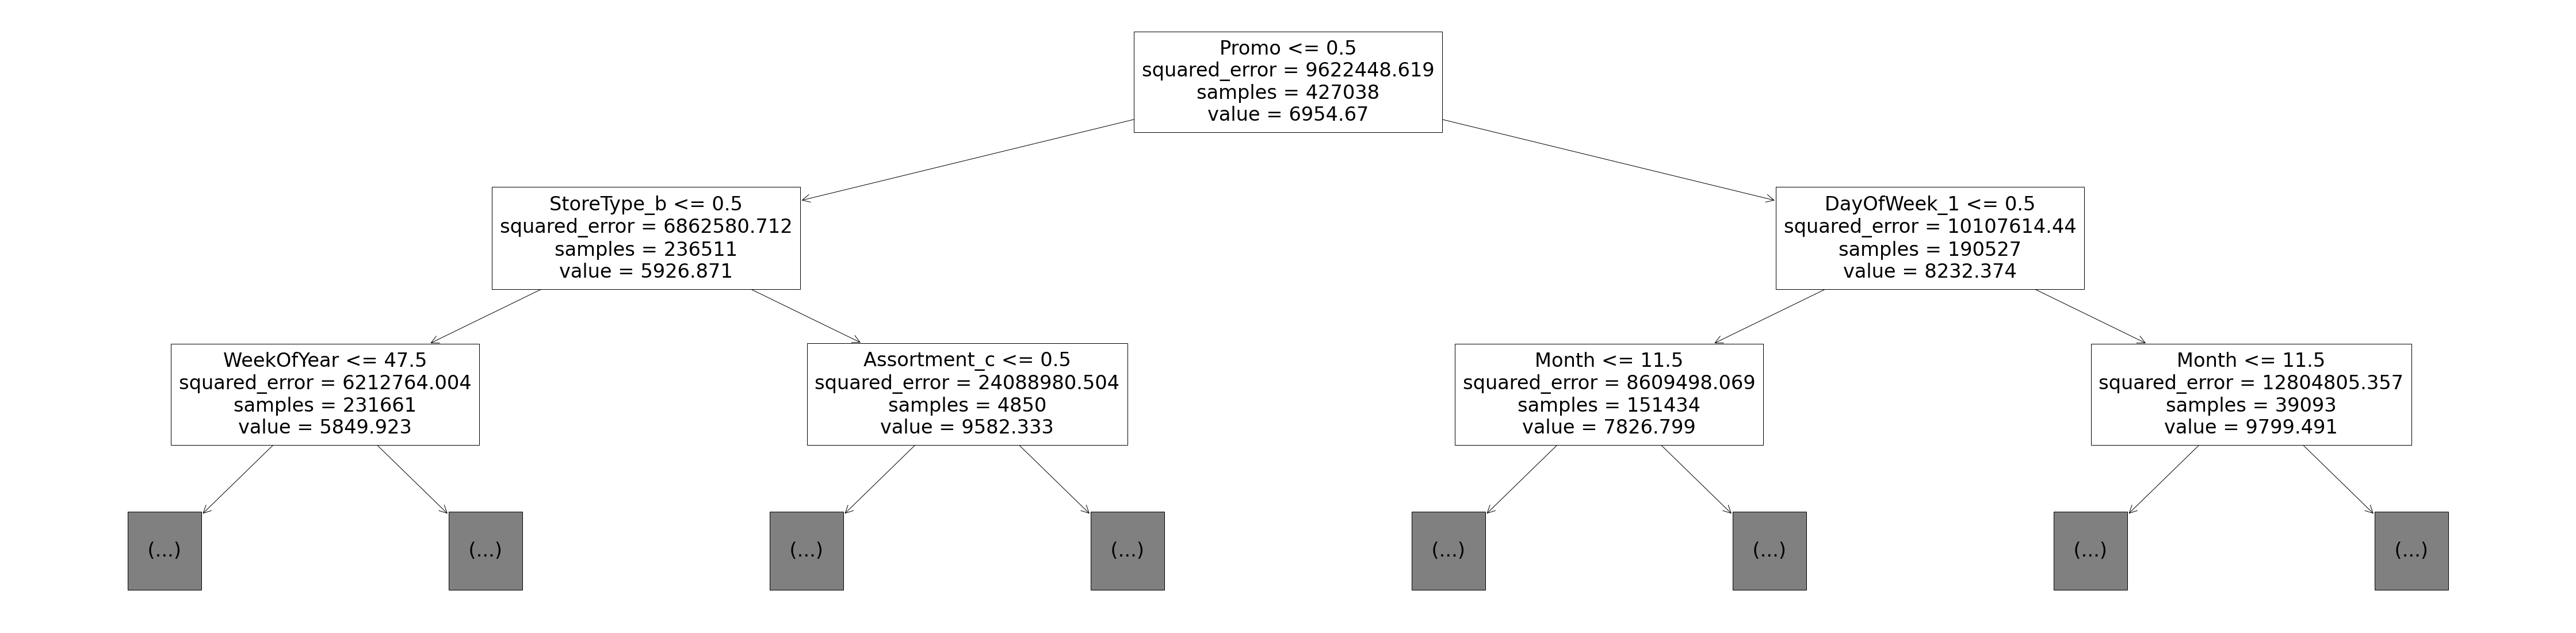

In [85]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(80,20))
plot_tree(models[3].estimators_[20], max_depth=2, feature_names=X_train.columns);

### Feature importance

Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [86]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [87]:
importance_df.head(10)

,feature,importance
3,CompetitionDistance,0.244450
0,Store,0.222256
1,Promo,0.133392
4,CompetitionOpen,0.077569
8,Day,0.040509
11,WeekOfYear,0.034754
6,Promo2Open,0.032208
12,DayOfWeek_1,0.032167
24,StoreType_b,0.024716
9,Month,0.019827


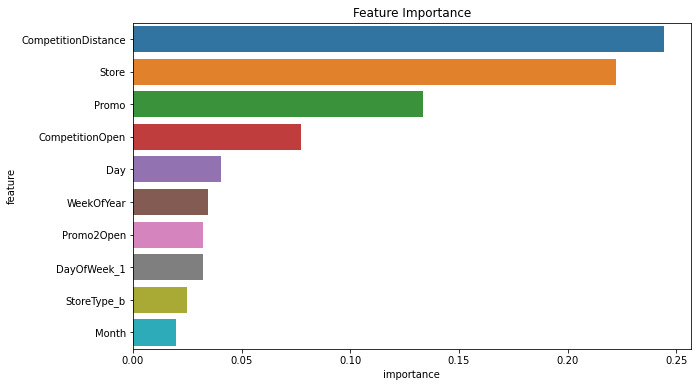

In [88]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Putting it Together and Making Predictions



Now that the model is trained, we can make predictions on the test set.

In [89]:
test_preds = predict_avg(models, X_test)

In [90]:
test_preds

array([ 4382.72      ,  7768.88666667,  9480.1       , ...,
        7194.72      , 27646.74      ,  7029.86666667])

Let's add the predictions into `submission_df`.

In [91]:
submission_df['Sales']  = test_preds

Recall, however, if if the store is not open, then the sales must be 0. Thus, wherever the value of `Open` in the test set is 0, we can set the sales to 0. Also, there some missing values for `Open` in the test set. We'll replace them with 1 (open).

In [92]:
test_df.Open.isna().sum()

11

In [93]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)

In [94]:
submission_df

,Id,Sales
0,1,4382.720000
1,2,7768.886667
2,3,9480.100000
3,4,7816.933333
4,5,7465.700000
...,...,...
41083,41084,2956.020000
41084,41085,8862.393333
41085,41086,7194.720000
41086,41087,27646.740000


We can now save the predictions as a CSV file.

In [95]:
submission_df.to_csv('submission_final2.csv', index=None)